# Задание

Usage: ipykernel_launcher.py [options]

ipykernel_launcher.py: error: no such option: --ip
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\DimasX\anaconda3\lib\optparse.py", line 1387, in parse_args
    stop = self._process_args(largs, rargs, values)
  File "c:\Users\DimasX\anaconda3\lib\optparse.py", line 1427, in _process_args
    self._process_long_opt(rargs, values)
  File "c:\Users\DimasX\anaconda3\lib\optparse.py", line 1480, in _process_long_opt
    opt = self._match_long_opt(opt)
  File "c:\Users\DimasX\anaconda3\lib\optparse.py", line 1465, in _match_long_opt
    return _match_abbrev(opt, self._long_opt)
  File "c:\Users\DimasX\anaconda3\lib\optparse.py", line 1670, in _match_abbrev
    raise BadOptionError(s)
optparse.BadOptionError: no such option: --ip

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\DimasX\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DimasX\AppData\Local\Temp/

TypeError: object of type 'NoneType' has no len()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.lines as mlines
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Задание 1

In [19]:
df = pd.read_csv('../datasets/credit_scoring.csv')
# df[~((df['Возраст'] < 18) | (df['Месячный доход'] < 10000))]
lst = df[(df['Возраст'] >= 18) & (df['Месячный доход'] > 10000)]['Имя'].to_list()
print(f'Клиенты, которым должны одобрить заявку на кредит: {lst}')

Клиенты, которым должны одобрить заявку на кредит: ['Ольга', 'Петр']


<center><img src="../misc/images/simple-tree.png"/> <center/>

Клиенты, которым должны одобрить заявку на кредит: ____

## Задание 2

### Task 2

Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен
показывать вид ириса. Обязательно добавь легенду по маркерам.

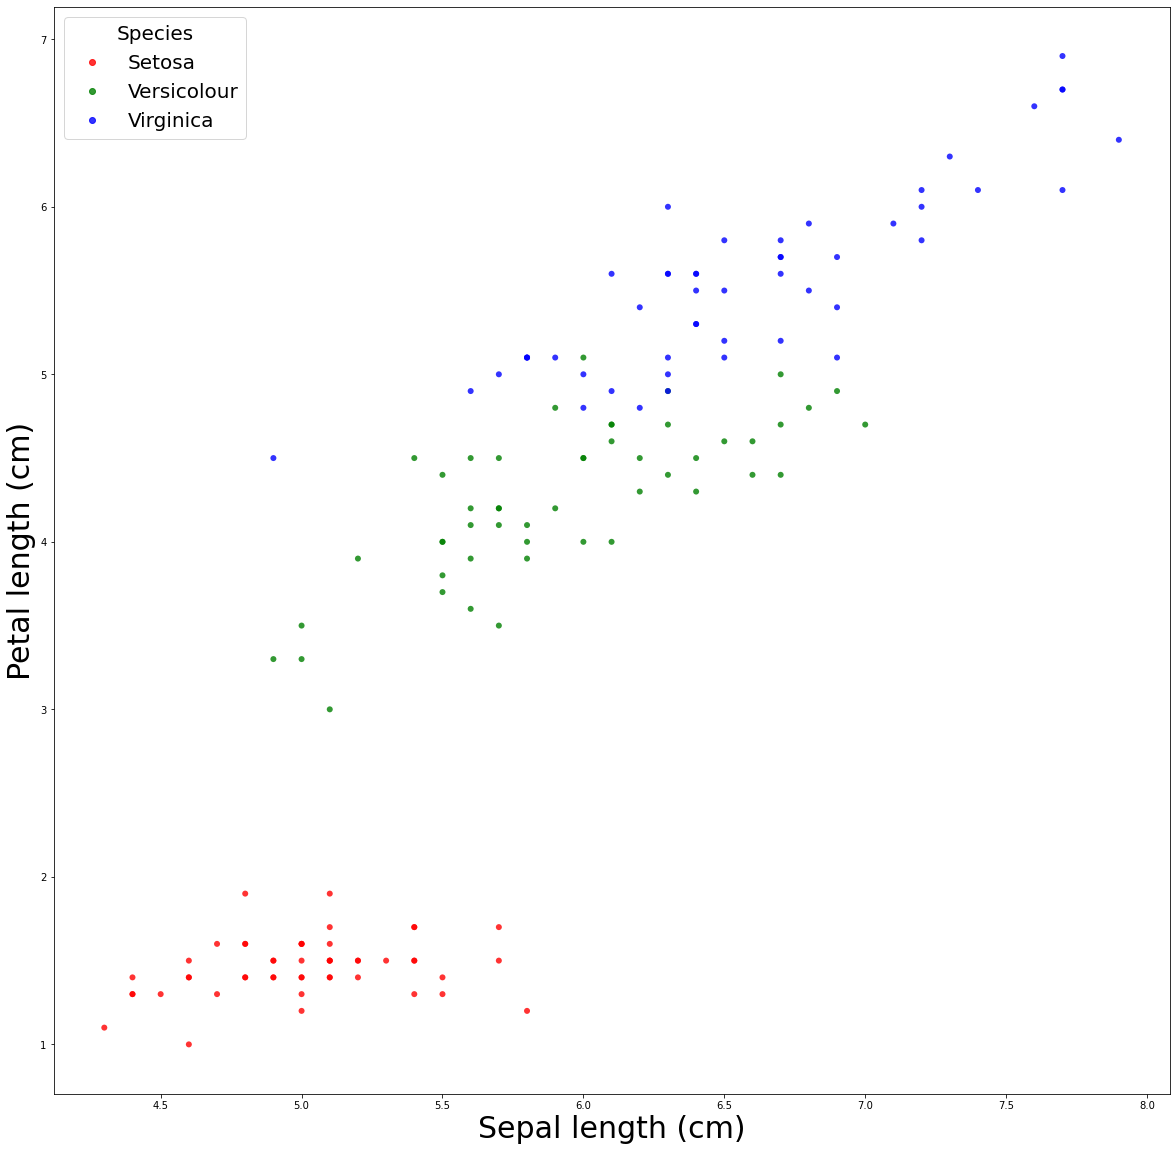

In [20]:

my_cmap = ListedColormap(['red', 'green', 'blue'])
data, target = load_iris(return_X_y=True, as_frame=True)
iris_df = pd.DataFrame(data)
iris_df.insert(4, "Sort", target)

plt.figure(figsize=(20, 20))
scatter = plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'],
                      alpha=0.8, edgecolors='none', c=iris_df['Sort'], cmap=my_cmap)


handles, labels = scatter.legend_elements()
legend = plt.legend(handles, ['Setosa', 'Versicolour', 'Virginica'], title='Species', loc='best', fontsize=20)
legend.get_title().set_fontsize(20)
plt.xlabel('Sepal length (cm)', fontdict=dict(fontsize=30))
plt.ylabel('Petal length (cm)', fontdict=dict(fontsize=30))
plt.show()

## Задание 3

### Task 3

Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность классификации и округли её до 3 знаков после запятой.

Точность классификации:  0.967


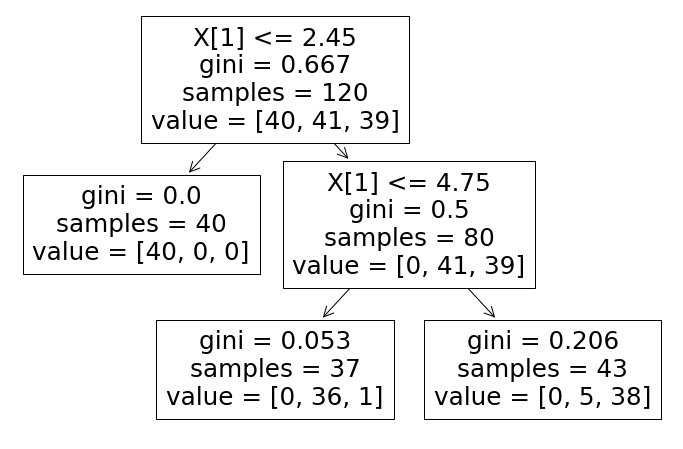

In [21]:

X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,[0, 2]], iris_df.iloc[:, 4], test_size=0.2, random_state=42)

# Обучим дерево решений с глубиной 2 на обучающей выборке
clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
# Получим предсказания для тестовой выборки
y_pred = clf.predict(X_test)

# Оценим точность классификации
accuracy = accuracy_score(y_test, y_pred)

# Округлим точность до 3 знаков после запятой
accuracy = round(accuracy, 3)

print("Точность классификации: ", accuracy)

# Визуализируем дерево решений
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, ax=ax)
plt.show()

## Задание 4

### Task 4

Построй разделяющую поверхность по признакам "Длина чашелистика" и "Длина лепестка".
Также отрисуй дерево, которое получилось в результате обучения модели.
Напиши сколько листов у получившегося дерева.

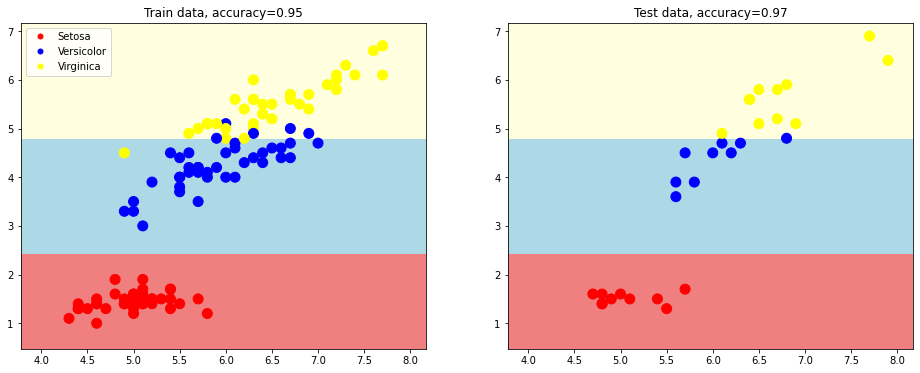

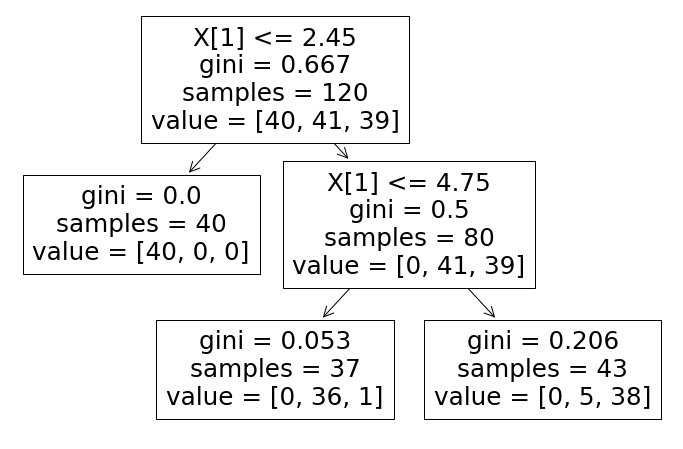

Number of leaves: 3


In [30]:



def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border;
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border;
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step));

def plot_decision_surface(
        model, train_data, train_labels, test_data, test_labels,
        colors=ListedColormap(['red', 'blue', 'yellow']),
        light_colors=ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
):
    # create legend handles
    setosa = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                       markersize=5, label='Setosa');
    versicolor = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                           markersize=5, label='Versicolor');
    virginica = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=5, label='Virginica');
    # set figure size
    plt.figure(figsize=(16, 6));
    plt.subplot(1, 2, 1);
    xx, yy = get_meshgrid(train_data);
    mesh_predictions = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape);

    # plot decision surface on the train data
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors, shading='auto');

    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors);
    plt.legend(handles=[setosa, versicolor, virginica], loc='best');
    # legend = plt.legend(handles, ['Setosa', 'Versicolour', 'Virginica'], title='Species', loc='best', fontsize=20)
    plt.title('Train data, accuracy={:.2f}'.format(accuracy_score(train_labels, model.predict(train_data))));

    # plot decision surface on the test data
    plt.subplot(1, 2, 2);
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors ,shading='auto');
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors, );
    plt.title('Test data, accuracy={:.2f}'.format(accuracy_score(test_labels, model.predict(test_data))));


X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,[0, 2]], iris_df.iloc[:, 4], test_size=0.2, random_state=42);
# Обучим дерево решений с глубиной 2 на обучающей выборке
clf = DecisionTreeClassifier(max_depth=2);
clf = clf.fit(X_train, y_train);
plot_decision_surface(clf, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test));
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, ax=ax)
plt.show()
num_leaves = clf.tree_.n_leaves
print("Number of leaves:", num_leaves)
# xx, yy = get_meshgrid(data=np.array(X_train), step=0.05, border=0.5)
# # Получим предсказания для всех точек сетки
# Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# # Построим разделяющую поверхность и точки выборки
# plt.figure(figsize=(10, 8))
# plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# plt.scatter(np.array(X_train.iloc[:, 0]), np.array(X_train.iloc[:, 1]), c=np.array(y_train), cmap=plt.cm.RdYlBu_r, edgecolor='k');

# plt.xlabel('Длина чашелистика')
# plt.ylabel('Длина лепестка')
# plt.title('Разделяющая поверхность')
# plt.show()

## Просто для себя


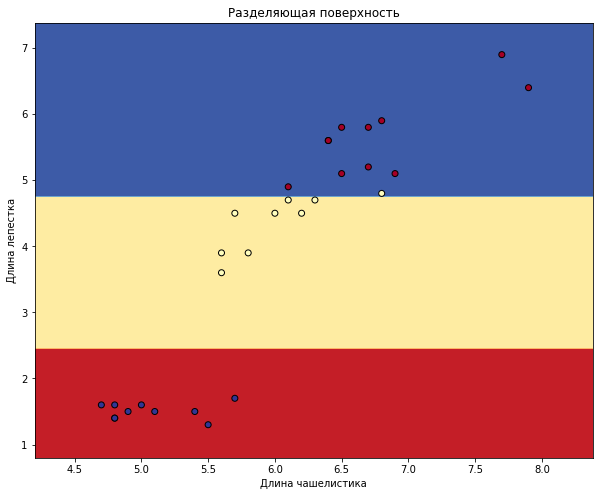

In [23]:

# Загрузим набор данных Iris
iris = load_iris()

# Выберем только два признака - длину чашелистика и длину лепестка
X = iris.data[:, [0, 2]]
y = iris.target

# Обучим дерево решений с глубиной 2 на всей выборке
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

# Определим границы значений признаков
x_min, x_max = X_test.iloc[:, 0].min() - 0.5, X_test.iloc[:, 0].max() + 0.5
y_min, y_max = X_test.iloc[:, 1].min() - 0.5, X_test.iloc[:, 1].max() + 0.5

# Сгенерируем сетку точек для построения разделяющей поверхности
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Получим предсказания для всех точек сетки
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построим разделяющую поверхность и точки выборки
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=plt.cm.RdYlBu_r, edgecolor='k')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.title('Разделяющая поверхность')
plt.show()

### У получившегося дерева 13 листов (неограниченная глубина)
### У получившегося дерева 3 листа (глубина 2)

## Задание 5

### Task 5

Теперь попробуем с помощью дерева решений решить задачу регрессии. Сгенерируй [синусоидальный сигнал](code-samples/dataset.py)
с небольшими шумами размером 250 отсчетов. Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1.
Построй график истинных ответов и предсказаний модели.

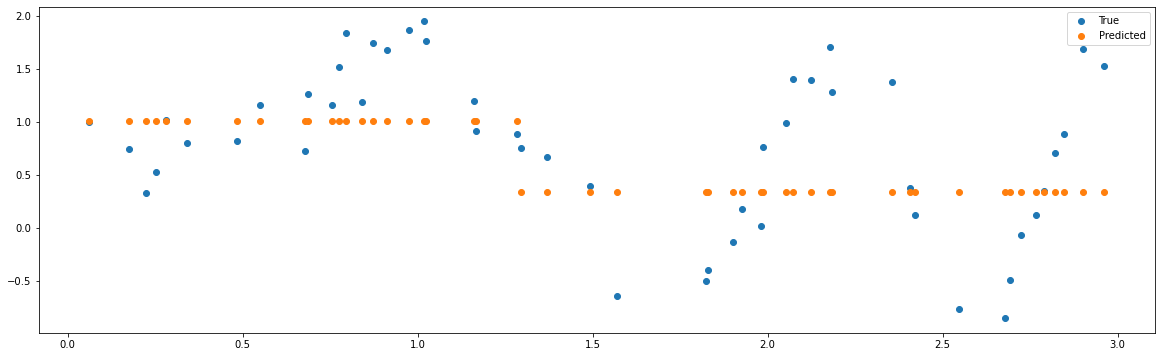

Number of leaves: 2
Mse:  0.442


In [31]:

def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    # X = X.reshape(-1, 1)
    # y = y.reshape(-1, 1)
    return X, y

X, Y = generate_sin(sample_size=250, n = 1)

sin_df = pd.DataFrame({'X': X.flatten(), 'Y' : Y.flatten()})

X_train, X_test, y_train, y_test = train_test_split(X.flatten(), Y.flatten(), test_size=0.2, random_state=42);
clf1 = DecisionTreeRegressor(max_depth=1);
clf1 = clf1.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
y_pred = clf1.predict(pd.DataFrame(X_test))

plt.figure(figsize=(20, 6))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred, label='Predicted')
plt.legend()
plt.show()
num_leaves = clf1.tree_.n_leaves
print("Number of leaves:", num_leaves)
# Оценим точность
mse = mean_squared_error(y_test, y_pred)
mse = round(mse, 3)
print("Mse: ", mse)

## Задание 6

### Task 6

Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE от глубины дерева
(от 1 до 30). Напиши глубину дерева, при котором качество модели наилучшее.

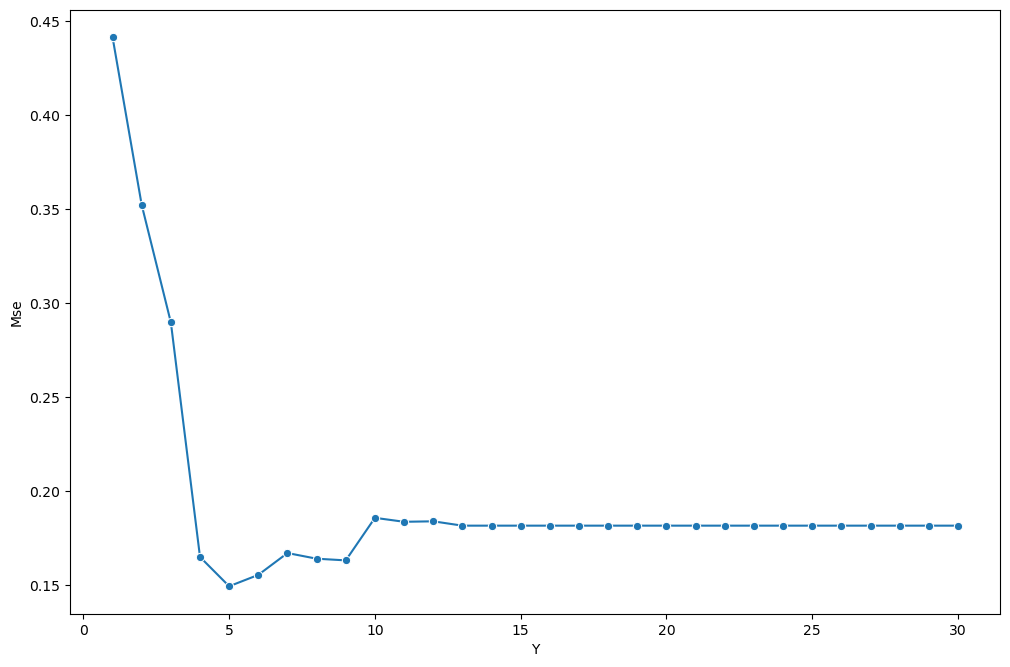

Min mse  = 0.149 max_depth = 5


In [25]:

mse_lst = []
for i in range(1,31):
    clf1 = DecisionTreeRegressor(max_depth=i);
    clf1 = clf1.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
    y_pred = clf1.predict(pd.DataFrame(X_test))
    mse = mean_squared_error(y_test, y_pred)
    mse_lst.append(mse)
# plot
y_lst = range(1,31)
mse_df = pd.DataFrame({'Mse': mse_lst, 'Y' : y_lst})


fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
# Plot the responses for different events and regions
sns.lineplot(x="Y", y="Mse", data=mse_df, marker='o', ax=ax);
plt.show()
print(f'Min mse  = {round(np.min(mse_lst),3)} max_depth = {np.argmin(mse_lst) + 1}')

Глубина дерева, на котором MSE на тестовой выборке наилучший: __

## Задание 7

### Task 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из ` ` для того, чтобы обучить сразу
несколько деревьев решений c параметром `max_depth=5`
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE
от количества базовых моделей в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50).
Напиши кол-во деревьев, при котором качество модели наилучшее.

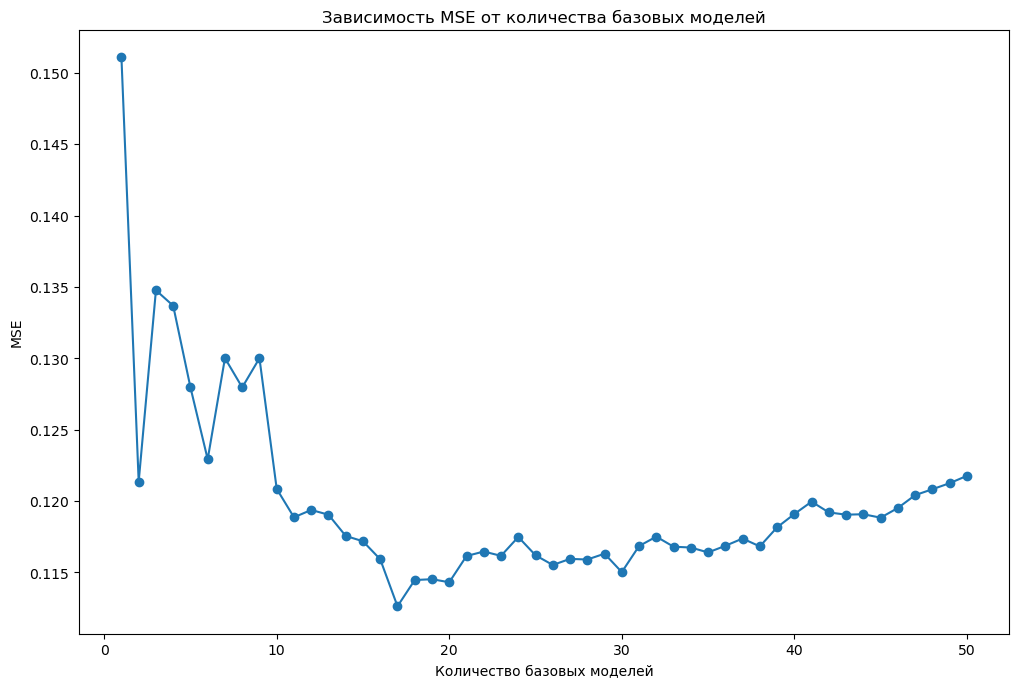

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 17 При MSE 0.11263331674327323


In [26]:

mse_lst = []
def get_mse(base_estimator, n_estimators, X_train, y_train, X_test, y_test):
    clf = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42, bootstrap=True)
    clf = clf.fit(pd.DataFrame(X_train), y_train)
    y_pred = clf.predict(X_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, y_pred)
    return mse


tree = DecisionTreeRegressor(max_depth=5)
for i in range(1, 51):
    mse = get_mse(tree, i, X_train, y_train, X_test, y_test)
    mse_lst.append(mse)
# построение графика зависимости MSE от количества базовых моделей
plt.subplots(figsize=(12, 8), dpi=100)
plt.plot(range(1, 51), mse_lst, marker='o')
plt.xlabel('Количество базовых моделей')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества базовых моделей')
plt.show()
# определение количества базовых моделей, при котором достигается минимальное значение MSE
best_n_estimators = np.argmin(mse_lst) + 1
print('Количество деревьев решений, при котором MSE на тестовой выборке наилучший:', best_n_estimators, 'При MSE', mse_lst[best_n_estimators - 1])

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 17

## Задание 8

### Task 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5,  n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X.flatten(), Y.flatten(), test_size=0.2, random_state=42);
clf = RandomForestRegressor(n_estimators=100, random_state=42, max_features=1, max_depth=5)
clf = clf.fit(pd.DataFrame(X_train), y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {round(mse, 3)}')

MSE = 0.123
